<a href="https://colab.research.google.com/github/faseenasherin/DSA/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOAN APPROVAL PREDICTION**

The aim of this project is to predict whether the loan would be approved by the bank, by analyzing the applicant's information which includes loan amount, credit score, education, person income and many other variables. Thorugh this project, we can analyze the factors that affect the loan approval and also predict the loan approval status for a new applicant. Moreover, this will help in providing priority services to the customers who are more likely to get their loan approved.

# **ABOUT THE DATASET**

The loan approval dataset is a collection of financial records and related information used to determine the eligibility of individuals for obtaining loans from a lending institution. It includes various factors such as person_age, income,person employment length,loan amount, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.  [Source:Kaggle-Credit Risk Dataset]

###Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline # Import ImbPipeline





###Loading Data

In [ ]:
loan_data = pd.read_csv('/content/credit_risk_new_dataset.csv')

In [ ]:
loan_data.head() # first 5 rows

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [ ]:
loan_data.tail() # last 5 rows

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32569,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32570,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32571,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32572,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32573,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [ ]:
loan_data.shape # no of rows and columns

(32574, 12)

In [ ]:
loan_data.info() # dataframe summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32574 entries, 0 to 32573
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  object 
 3   person_emp_length           31679 non-null  float64
 4   loan_intent                 32574 non-null  object 
 5   loan_grade                  32574 non-null  object 
 6   loan_amnt                   32574 non-null  int64  
 7   loan_int_rate               29459 non-null  float64
 8   loan_status                 32574 non-null  int64  
 9   loan_percent_income         32574 non-null  float64
 10  cb_person_default_on_file   32574 non-null  object 
 11  cb_person_cred_hist_length  32574 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
loan_data.describe() # statistical summary of data

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32574.000000,3.257400e+04,31679.000000,32574.000000,29459.000000,32574.000000,32574.000000,32574.000000
mean,27.718426,6.587848e+04,4.782064,9588.018051,11.011529,0.218180,0.170202,5.804108
std,6.204987,5.253194e+04,4.034948,6320.249598,3.240497,0.413017,0.106755,4.053873
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
loan_data.nunique() # no of unique values in a column

,0
person_age,56
person_income,4294
person_home_ownership,4
person_emp_length,35
loan_intent,6
loan_grade,7
loan_amnt,753
loan_int_rate,348
loan_status,2
loan_percent_income,77


In [ ]:
loan_data.columns # column name

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

# **DATA PREPROCESSING**  
# **DATA CLEANING**

Data cleaning is the process of preparing raw data for analysis by removing errors, inconsistencies, and irrelevant information. In this loan approval prediction project, data cleaning ensures the dataset is accurate, consistent, and reliable for training machine learning models.

**Duplicate Removal**

In [ ]:
loan_data.duplicated().sum() # no of duplicate rows

np.int64(165)

In [ ]:
loan_data = loan_data.drop_duplicates() # removes duplicate rows

In [ ]:
loan_data.duplicated().sum() # no of duplicate rows

np.int64(0)

In [ ]:
loan_data.shape

(32409, 12)

In [ ]:
loan_data['loan_intent'].value_counts() # returns the no of times each unique values appears in the column loan_intent

,count
loan_intent,
EDUCATION,6409
MEDICAL,6042
VENTURE,5679
PERSONAL,5496
DEBTCONSOLIDATION,5189
HOMEIMPROVEMENT,3594


In [ ]:
loan_data['loan_grade'].value_counts()

,count
loan_grade,
A,10702
B,10384
C,6436
D,3619
E,963
F,241
G,64


In [ ]:
loan_data['loan_status'].value_counts()

,count
loan_status,
0,25321
1,7088


In [ ]:
loan_data.isnull().sum() # total number of nulls in each column

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,887
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3094
loan_status,0
loan_percent_income,0


####Handle Missing Values

In [ ]:
# Checking skewness of numerical columns
print("Skewness of employment length:",loan_data['person_emp_length'].skew())
print("Skewness of loan interest rate:",loan_data['loan_int_rate'].skew())

Skewness of employment length: 1.2496117579721073
Skewness of loan interest rate: 0.20713303244358824


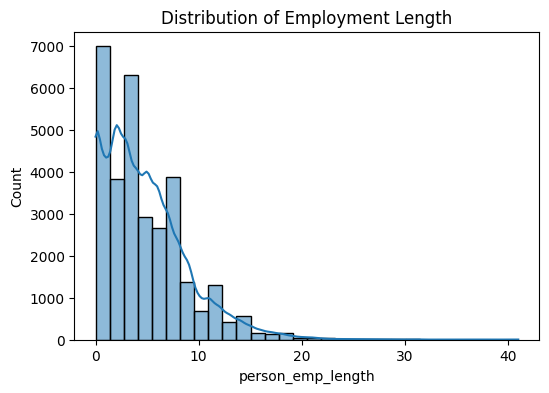

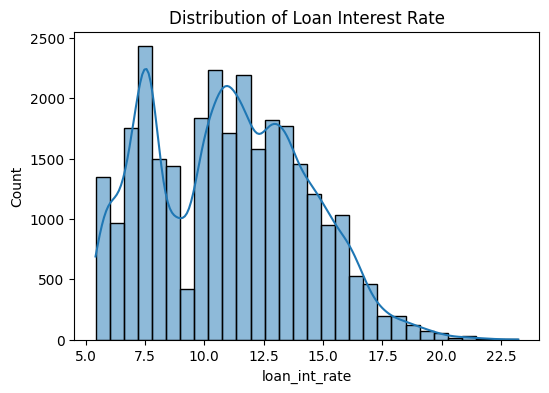

In [ ]:
# Employment Length
plt.figure(figsize=(6,4))
sns.histplot(loan_data['person_emp_length'], bins=30, kde=True)
plt.title("Distribution of Employment Length")
plt.show()

# Interest Rate
plt.figure(figsize=(6,4))
sns.histplot(loan_data['loan_int_rate'], bins=30, kde=True)
plt.title("Distribution of Loan Interest Rate")
plt.show()


In [ ]:
# Handle missing values based on skewness

# For highly skewed data (employment length) -> use Median
loan_data['person_emp_length'].fillna(loan_data['person_emp_length'].median(), inplace=True)

# For nearly symmetric data (loan interest rate) -> use Mean
loan_data['loan_int_rate'].fillna(loan_data['loan_int_rate'].mean(), inplace=True)

/tmp/ipython-input-1936235715.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['person_emp_length'].fillna(loan_data['person_emp_length'].median(), inplace=True)
/tmp/ipython-input-1936235715.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [ ]:
# Verify no missing values remain
print(loan_data.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64



**EDA+VISUALIZATION**

In the exploratory data analysis, we will be looking at the distribution of the data across the varaiables, followed by relationship between the independent and target variable and the correlation among the variables. Through the visualization, I will be able to understand the possible trends and patterns in the data and come to know about the hidden insights of the data.

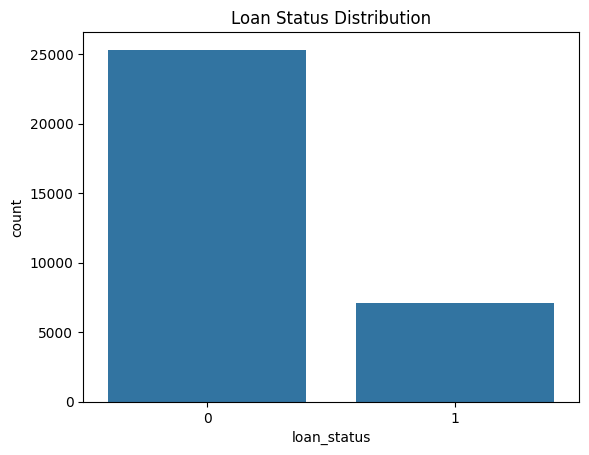

In [ ]:
# Distribution of target variable
sns.countplot(x="loan_status", data = loan_data)
plt.title("Loan Status Distribution")
plt.show()

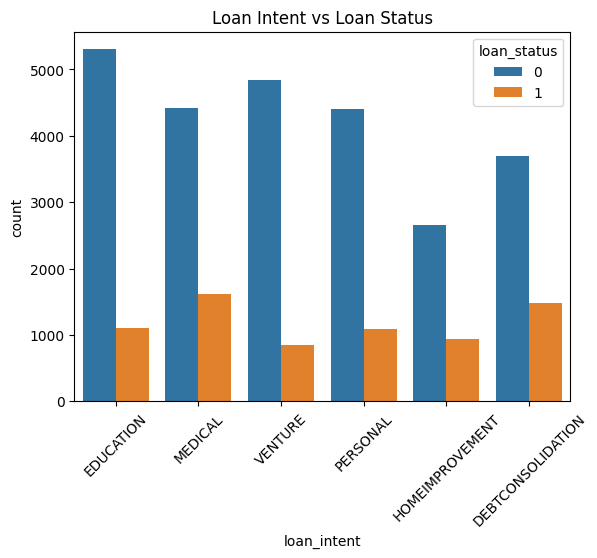

In [ ]:
# Loan intent vs approval
sns.countplot(x="loan_intent", hue="loan_status", data=loan_data)
plt.title("Loan Intent vs Loan Status")
plt.xticks(rotation=45)
plt.show()

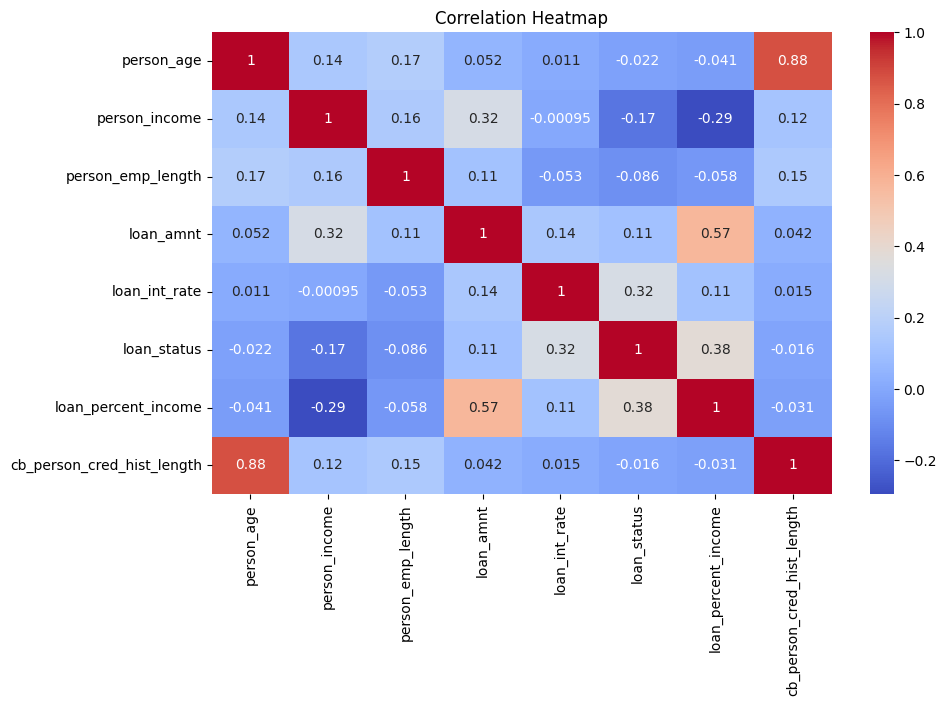

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
numeric_columns = loan_data.select_dtypes(include=np.number) # Select only numeric columns
sns.heatmap(numeric_columns.corr(), annot=True, cmap="coolwarm") # Calculate and display heatmap for numeric columns
plt.title("Correlation Heatmap")
plt.show()



**OUTLIER HANDLING**

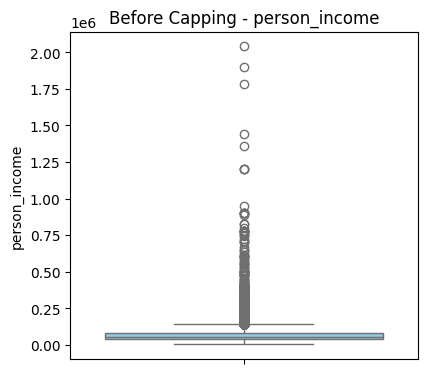

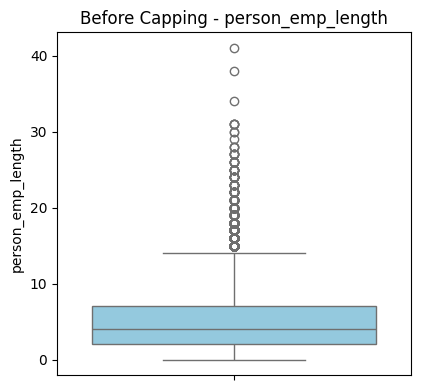

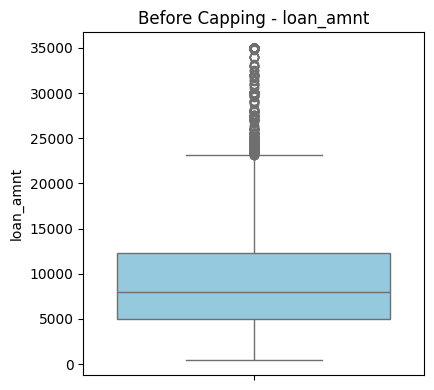

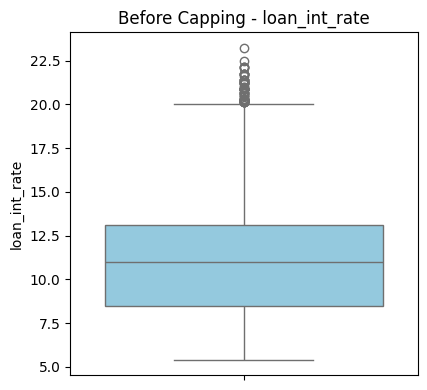

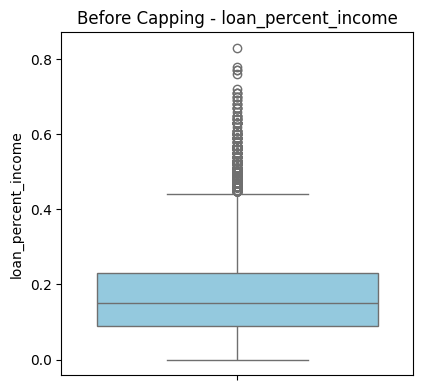

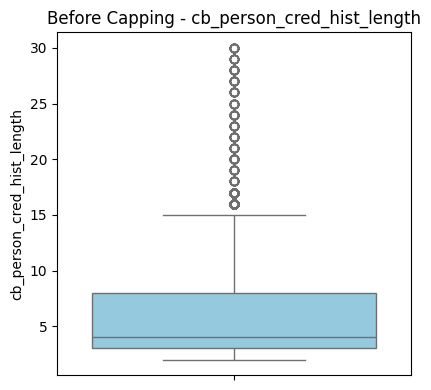

In [ ]:
for col in numeric_columns:
  if col == 'person_age' or col == 'loan_status':
    continue   # skip capping for age and loan status
  plt.figure(figsize=(8,4))

  plt.subplot(1,2,1)
  sns.boxplot(y=loan_data[col], color="skyblue")
  plt.title(f"Before Capping - {col}")
  plt.tight_layout()
  plt.show()

In [ ]:
for col in numeric_columns:
  if col == 'person_age' or col == 'loan_status':
    continue   # skip capping for age and loan status

  Q1 = loan_data[col].quantile(0.25)
  Q3 = loan_data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Cap values instead of removing
  loan_data[col] = np.where(loan_data[col] < lower_bound, lower_bound,
                            np.where(loan_data[col] > upper_bound, upper_bound, loan_data[col]))

# Keep only applicants aged between 18 and 70 (realistic loan age range)
loan_data = loan_data[(loan_data['person_age'] >= 18) & (loan_data['person_age'] <= 70)]

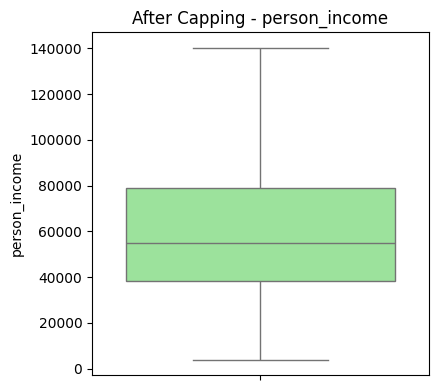

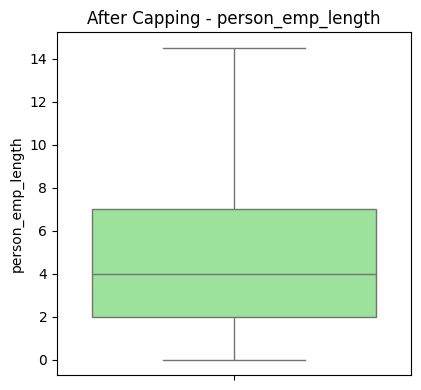

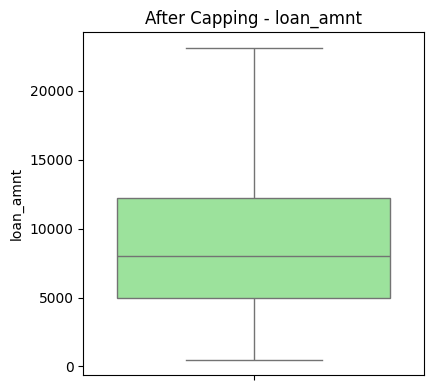

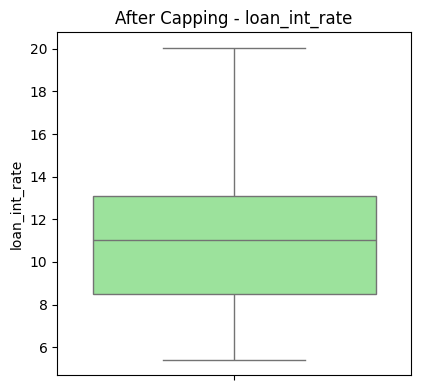

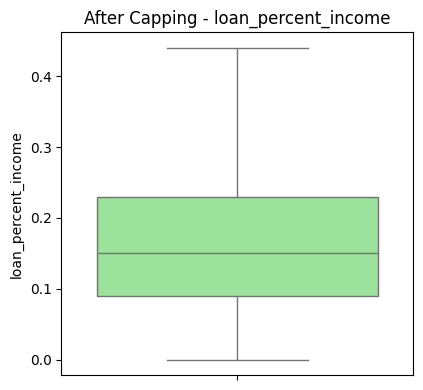

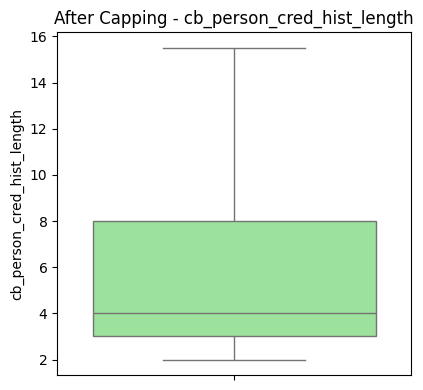

In [ ]:
for col in numeric_columns:
  if col == 'person_age' or col == 'loan_status':
    continue   # skip age and loan status
  plt.figure(figsize=(8,4))

  plt.subplot(1,2,2)
  sns.boxplot(y = loan_data[col], color="lightgreen")
  plt.title(f"After Capping - {col}")

  plt.tight_layout()
  plt.show()

**FEATURE ENGINEERING**

In [ ]:
#Create Debt-to-Income ratio
loan_data["debt_to_income_ratio"] = loan_data["loan_amnt"] / loan_data["person_income"]
loan_data


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,debt_to_income_ratio
0,21,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0,0.10,N,2.0,0.104167
1,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,1,0.44,N,3.0,0.572917
2,23,65500.0,RENT,4.0,MEDICAL,C,23125.0,15.23,1,0.44,N,2.0,0.353053
3,24,54400.0,RENT,8.0,MEDICAL,C,23125.0,14.27,1,0.44,Y,4.0,0.425092
4,21,9900.0,OWN,2.0,VENTURE,A,2500.0,7.14,1,0.25,N,2.0,0.252525
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32569,57,53000.0,MORTGAGE,1.0,PERSONAL,C,5800.0,13.16,0,0.11,N,15.5,0.109434
32570,54,120000.0,MORTGAGE,4.0,PERSONAL,A,17625.0,7.49,0,0.15,N,15.5,0.146875
32571,65,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,23125.0,10.99,1,0.44,N,15.5,0.304276
32572,56,140250.0,MORTGAGE,5.0,PERSONAL,B,15000.0,11.48,0,0.10,N,15.5,0.106952


**ENCODING**

In [ ]:
#Label encode binary column
loan_data["cb_person_default_on_file"] = loan_data["cb_person_default_on_file"].map({"Y":1, "N":0})
loan_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,debt_to_income_ratio
0,21,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0,0.10,0,2.0,0.104167
1,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,1,0.44,0,3.0,0.572917
2,23,65500.0,RENT,4.0,MEDICAL,C,23125.0,15.23,1,0.44,0,2.0,0.353053
3,24,54400.0,RENT,8.0,MEDICAL,C,23125.0,14.27,1,0.44,1,4.0,0.425092
4,21,9900.0,OWN,2.0,VENTURE,A,2500.0,7.14,1,0.25,0,2.0,0.252525
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32569,57,53000.0,MORTGAGE,1.0,PERSONAL,C,5800.0,13.16,0,0.11,0,15.5,0.109434
32570,54,120000.0,MORTGAGE,4.0,PERSONAL,A,17625.0,7.49,0,0.15,0,15.5,0.146875
32571,65,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,23125.0,10.99,1,0.44,0,15.5,0.304276
32572,56,140250.0,MORTGAGE,5.0,PERSONAL,B,15000.0,11.48,0,0.10,0,15.5,0.106952


In [ ]:
# Create mapping for loan_grade
grade_mapping = {
    "A": 0,
    "B": 1,
    "C": 2,
    "D": 3,
    "E": 4,
    "F": 5,
    "G": 6
}

# Apply mapping
if "loan_grade" in loan_data.columns:
    loan_data["loan_grade"] = loan_data["loan_grade"].map(grade_mapping)

# Verify encoding
print(loan_data["loan_grade"].value_counts())
loan_data


loan_grade
0    10697
1    10382
2     6435
3     3619
4      963
5      241
6       64
Name: count, dtype: int64


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,debt_to_income_ratio
0,21,9600.0,OWN,5.0,EDUCATION,1,1000.0,11.14,0,0.10,0,2.0,0.104167
1,25,9600.0,MORTGAGE,1.0,MEDICAL,2,5500.0,12.87,1,0.44,0,3.0,0.572917
2,23,65500.0,RENT,4.0,MEDICAL,2,23125.0,15.23,1,0.44,0,2.0,0.353053
3,24,54400.0,RENT,8.0,MEDICAL,2,23125.0,14.27,1,0.44,1,4.0,0.425092
4,21,9900.0,OWN,2.0,VENTURE,0,2500.0,7.14,1,0.25,0,2.0,0.252525
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32569,57,53000.0,MORTGAGE,1.0,PERSONAL,2,5800.0,13.16,0,0.11,0,15.5,0.109434
32570,54,120000.0,MORTGAGE,4.0,PERSONAL,0,17625.0,7.49,0,0.15,0,15.5,0.146875
32571,65,76000.0,RENT,3.0,HOMEIMPROVEMENT,1,23125.0,10.99,1,0.44,0,15.5,0.304276
32572,56,140250.0,MORTGAGE,5.0,PERSONAL,1,15000.0,11.48,0,0.10,0,15.5,0.106952


In [ ]:
# One-hot encode categorical features and force dtype to int
loan_data = pd.get_dummies(
    loan_data,
    columns=["loan_intent", "person_home_ownership"],
    drop_first=True,
    dtype=int   # this ensures 0/1 instead of True/False
)

loan_data.head()


,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,debt_to_income_ratio,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,21,9600.0,5.0,1,1000.0,11.14,0,0.10,0,2.0,0.104167,1,0,0,0,0,0,1,0
1,25,9600.0,1.0,2,5500.0,12.87,1,0.44,0,3.0,0.572917,0,0,1,0,0,0,0,0
2,23,65500.0,4.0,2,23125.0,15.23,1,0.44,0,2.0,0.353053,0,0,1,0,0,0,0,1
3,24,54400.0,8.0,2,23125.0,14.27,1,0.44,1,4.0,0.425092,0,0,1,0,0,0,0,1
4,21,9900.0,2.0,0,2500.0,7.14,1,0.25,0,2.0,0.252525,0,0,0,0,1,0,1,0


**SCALING**


In [ ]:
# Identify the numerical columns to be scaled
# Exclude categorical columns and the target variable 'loan_status'
numerical_cols = [
    'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'
]

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your numerical data and transform it
# Using .loc to prevent a SettingWithCopyWarning
loan_data.loc[:, numerical_cols] = scaler.fit_transform(loan_data[numerical_cols])

# Display the first few rows to confirm the scaling
print(loan_data.head())

   person_age  person_income  person_emp_length  loan_grade  loan_amnt  \
0   -1.090965      -1.661153           0.085617           1  -1.444471   
1   -0.441400      -1.661153          -0.990236           2  -0.672302   
2   -0.766182       0.096582          -0.183346           2   2.352025   
3   -0.603791      -0.252450           0.892507           2   2.352025   
4   -1.090965      -1.651719          -0.721273           0  -1.187081   

   loan_int_rate  loan_status  loan_percent_income  cb_person_default_on_file  \
0       0.040427            0            -0.672627                          0   
1       0.602586            1             2.648167                          0   
2       1.369462            1             2.648167                          0   
3       1.057512            1             2.648167                          1   
4      -1.259362            1             0.792429                          0   

   cb_person_cred_hist_length  debt_to_income_ratio  loan_intent_EDU

/tmp/ipython-input-723019960.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.09096463 -0.44139978 -0.7661822  ...  6.05424875  4.59272783
  6.21663996]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  loan_data.loc[:, numerical_cols] = scaler.fit_transform(loan_data[numerical_cols])


In [ ]:
loan_data

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,debt_to_income_ratio,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,-1.090965,-1.661153,0.085617,1,-1.444471,0.040427,0,-0.672627,0,-0.999927,0.104167,1,0,0,0,0,0,1,0
1,-0.441400,-1.661153,-0.990236,2,-0.672302,0.602586,1,2.648167,0,-0.730419,0.572917,0,0,1,0,0,0,0,0
2,-0.766182,0.096582,-0.183346,2,2.352025,1.369462,1,2.648167,0,-0.999927,0.353053,0,0,1,0,0,0,0,1
3,-0.603791,-0.252450,0.892507,2,2.352025,1.057512,1,2.648167,1,-0.460911,0.425092,0,0,1,0,0,0,0,1
4,-1.090965,-1.651719,-0.721273,0,-1.187081,-1.259362,1,0.792429,0,-0.999927,0.252525,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32569,4.755119,-0.296472,-0.990236,2,-0.620824,0.696821,0,-0.574956,0,2.638432,0.109434,0,0,0,1,0,0,0,0
32570,4.267945,1.810294,-0.183346,0,1.408264,-1.145630,0,-0.184275,0,2.638432,0.146875,0,0,0,1,0,0,0,0
32571,6.054249,0.426746,-0.452309,1,2.352025,-0.008315,1,2.648167,0,2.638432,0.304276,0,1,0,0,0,0,0,1
32572,4.592728,2.447040,0.085617,1,0.957832,0.150909,0,-0.672627,0,2.638432,0.106952,0,0,0,1,0,0,0,0


PCA

Dimensionality Reduction

In [ ]:
# Separate features and target
X = loan_data.drop('loan_status', axis=1)
y = loan_data['loan_status']

In [ ]:
# Identify categorical columns
categorical_cols = ['cb_person_default_on_file']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=categorical_cols, dtype=int)

# Now apply PCA to the encoded data
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_encoded)

print("Original shape:", X_encoded.shape)
print("Reduced shape after PCA:", X_pca.shape)

Original shape: (32401, 19)
Reduced shape after PCA: (32401, 11)


**PCA-Variane plot**

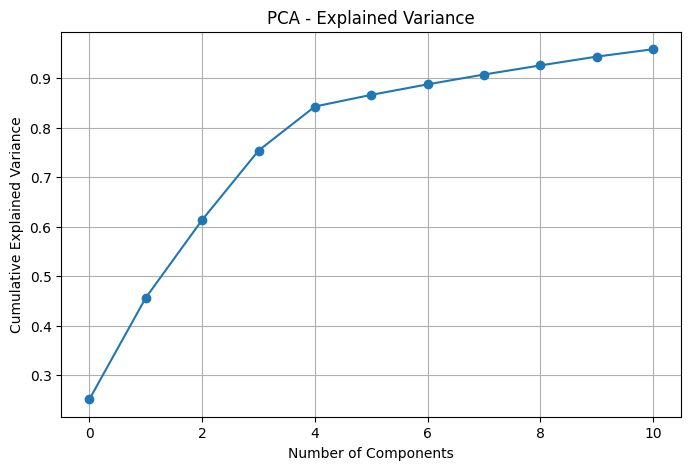

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid(True)
plt.show()

In [ ]:
loan_data.shape

(32401, 19)

# **TEST/TRAIN SPLIT**

In [ ]:
print(X.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'debt_to_income_ratio', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT'],
      dtype='object')


In [ ]:
# One-hot encode categorical features
categorical_cols = ['cb_person_default_on_file']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)

# 2. Train-test split (before balancing!)
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Initialize undersampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling only on training data
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

print("Before balancing:\n", y_train.value_counts())
print("\nAfter balancing:\n", y_train_res.value_counts())

Before balancing:
 loan_status
0    20250
1     5670
Name: count, dtype: int64

After balancing:
 loan_status
0    5670
1    5670
Name: count, dtype: int64


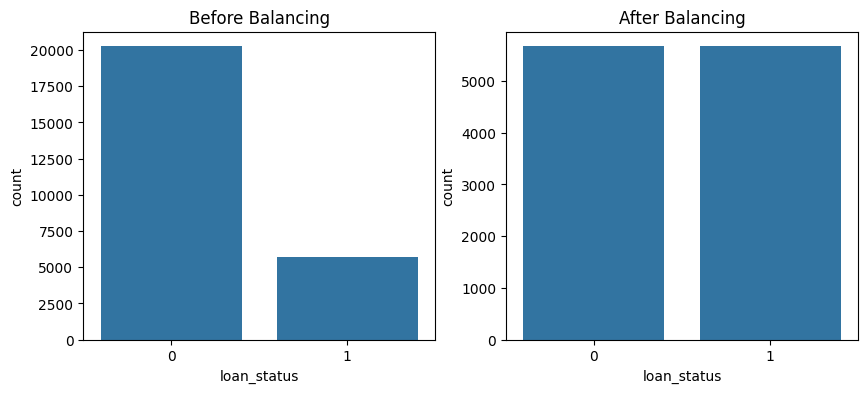

In [ ]:
# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title("Before Balancing")

sns.countplot(x=y_train_res, ax=axes[1])
axes[1].set_title("After Balancing")

plt.show()

In [ ]:
loan_data = pd.concat([X_train_res, y_train_res], axis=1)


NameError: name 'pd' is not defined

In [ ]:
#Sort by index (original row order)
loan_data = loan_data.sort_index()



In [ ]:
loan_data

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,debt_to_income_ratio,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,cb_person_default_on_file_1,loan_status
1,-0.441400,-1.661153,-0.990236,2,-0.672302,0.602586,2.648167,-0.730419,0.572917,0,0,1,0,0,0,0,0,0,1
2,-0.766182,0.096582,-0.183346,2,2.352025,1.369462,2.648167,-0.999927,0.353053,0,0,1,0,0,0,0,1,0,1
3,-0.603791,-0.252450,0.892507,2,2.352025,1.057512,2.648167,-0.460911,0.425092,0,0,1,0,0,0,0,1,1,1
4,-1.090965,-1.651719,-0.721273,0,-1.187081,-1.259362,0.792429,-0.999927,0.252525,0,0,0,0,1,0,1,0,0,1
5,-0.279009,0.461335,0.892507,1,2.352025,0.456360,2.648167,-0.730419,0.299935,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32558,4.755119,-0.705247,-0.990236,0,0.957832,-0.687454,2.062144,2.638432,0.375000,0,0,1,0,0,0,0,1,0,1
32562,3.780772,-0.076362,-0.990236,0,-0.329116,0.000491,-0.379616,2.638432,0.125000,0,0,0,1,0,0,0,0,0,0
32566,4.592728,0.866966,-1.259199,0,-0.380594,-1.574560,-0.867968,2.638432,0.080000,0,0,0,1,0,0,0,0,0,0
32567,3.943163,0.080985,-0.183346,3,1.815797,1.483193,1.378451,2.638432,0.307673,0,0,0,1,0,0,0,1,1,1


**MODEL BUILDING**

LOGISTIC REGRESSION

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
#evaluate the model
print("accuracy:",accuracy_score(y_test,y_pred))
print("precision:",precision_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))


accuracy: 0.8528004937509643
precision: 0.7334004024144869
f1_score: 0.6044776119402985
recall: 0.5141043723554302


RANDOM FOREST MODEL

In [ ]:
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)
#evaluation
print("accuracy:",accuracy_score(y_test,y_pred_rf))
print("precision:",precision_score(y_test,y_pred_rf))
print("f1_score:",f1_score(y_test,y_pred_rf))
print("recall:",recall_score(y_test,y_pred_rf))

accuracy: 0.9348865915753741
precision: 0.9662921348314607
f1_score: 0.830249396621078
recall: 0.7277856135401974


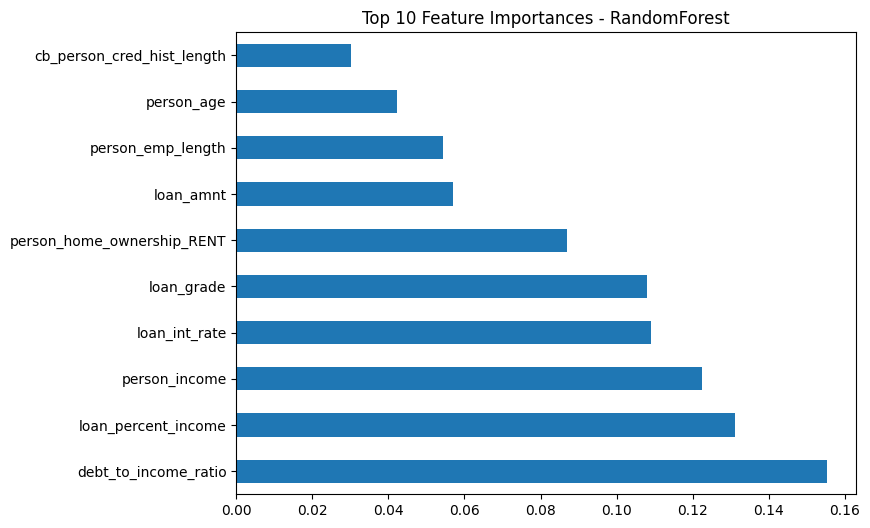

In [ ]:
# After training and evaluating RandomForest
importances = rf_model.feature_importances_
feat_importances = pd.Series(importances, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Feature Importances - RandomForest")
plt.show()

XGBOOST MODEL

In [ ]:
xgb_model=XGBClassifier(
    n_estimators=200,   # Number of trees
    learning_rate=0.1,  # Controls how much each tree contributes
    max_depth=5,       # Maximum depth of each tree
    subsample=0.8,     # Fraction of training samples used per tree
    colsample_bytree=0.8,   # Fraction of features used per tree
    random_state=42,       # For reproducibility
    use_label_encoder=False,    # Avoids warnings about label encoding
    eval_metric="logloss"     # Evaluation metric for classification
    )

xgb_model.fit(X_train,y_train)
y_pred_xgb=xgb_model.predict(X_test)

#evaluation
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:46:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Performance:
Accuracy: 0.9385897238080543
Precision: 0.9730983302411874
Recall: 0.7397743300423131
F1 Score: 0.8405448717948718


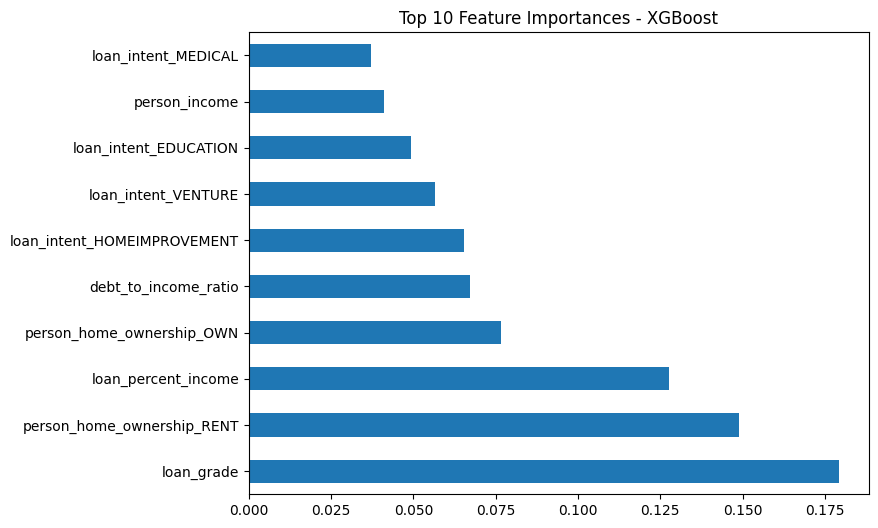

In [ ]:
# After training and evaluating XGBoost
importances = xgb_model.feature_importances_
feat_importances = pd.Series(importances, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Feature Importances - XGBoost")
plt.show()


SUPPORT VECTOR MACHINE

In [ ]:
svm_model=SVC(kernel='poly')
svm_model.fit(X_train,y_train)
y_pred_svm=svm_model.predict(X_test)
#evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))

Accuracy: 0.9072673970066347
Precision: 0.9097291875626881
Recall: 0.6396332863187588
F1 Score: 0.7511387163561076


MODEL EVALUATION

CONFUSION MATRIX

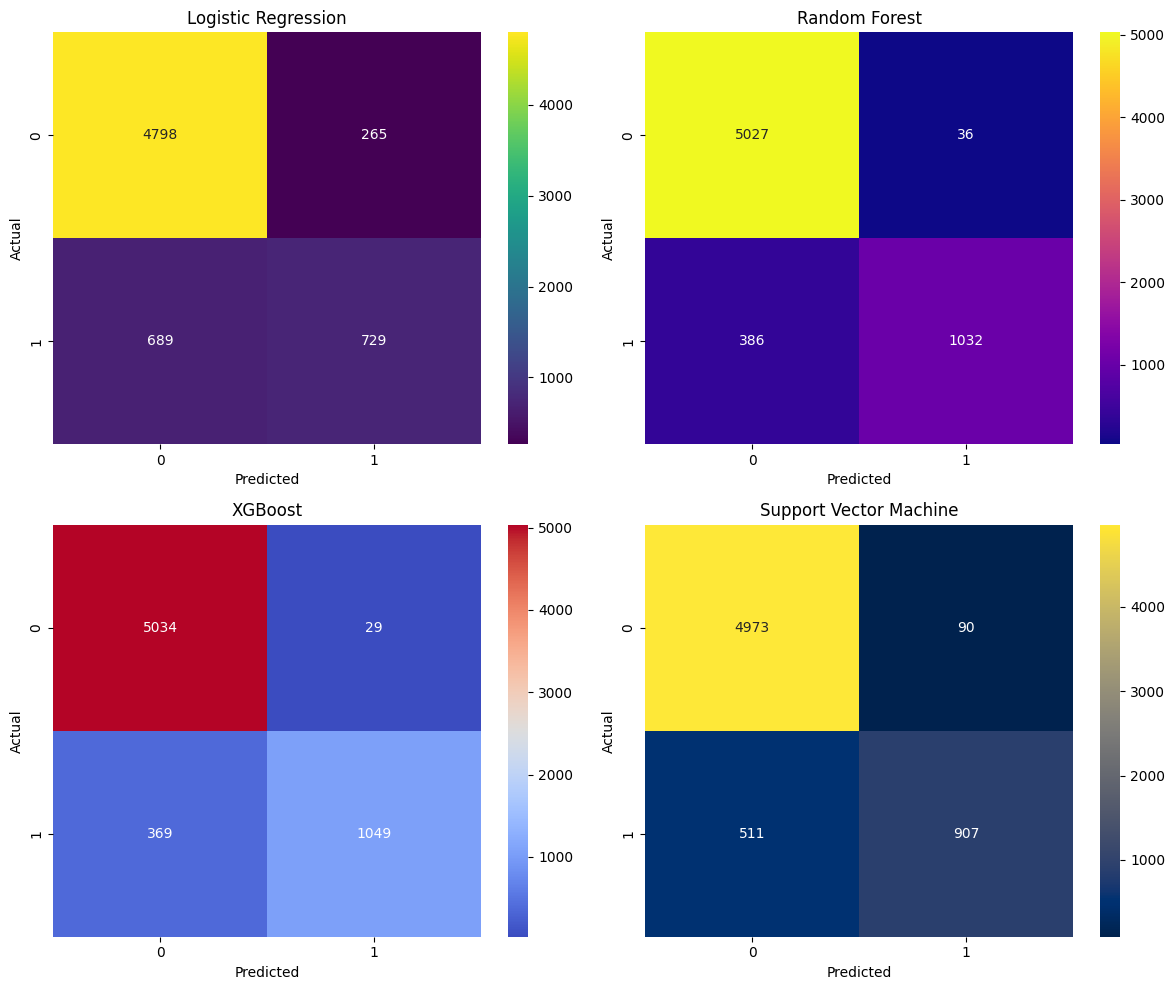

In [ ]:
# Get predictions
y_pred = log_reg.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Plot confusion matrices
fig, axes = plt.subplots(2,2, figsize=(12, 10))
axes = axes.ravel()

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="viridis", ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Logistic Regression')

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="plasma", ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Random Forest')

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="coolwarm", ax=axes[2])
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_title('XGBoost')


sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="cividis", ax=axes[3])
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('Actual')
axes[3].set_title('Support Vector Machine')



plt.tight_layout()
plt.show()


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost Model": XGBClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')


    results.append([name, accuracy, precision, recall, f1])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
display(results_df)

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.852800,0.843574,0.852800,0.842821
1,Random Forest,0.934887,0.936917,0.934887,0.931391
2,XGBoost Model,0.937664,0.938499,0.937664,0.934895
3,Support Vector Machine,0.913285,0.914133,0.913285,0.907645


Among the four models tested, XGBoost performed the best with the highest accuracy (93.7%), F1-score (0.93), making it the most suitable for predicting loan approval.

# **HYPER PARAMETER TUNING**

In [ ]:
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


# Grid search
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='recall',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Recall Score:", grid_search.best_score_)

# Final tuned model
best_xgb = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:50:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Recall Score: 0.7444444444444445


In [ ]:
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_fast = RandomizedSearchCV(RandomForestClassifier(),
                                        param_distributions=param_dist_rf,
                                        n_iter=20,
                                        scoring='recall',
                                        cv=3,
                                        verbose=2,
                                        n_jobs=-1,
                                        random_state=42)

random_search_fast.fit(X_train, y_train)
best_rf = random_search_fast.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
# Best tuned models
best_xgb = grid_search.best_estimator_    # from xgboosting Search
best_rf = random_search_fast.best_estimator_   # from Random Forest RandomizedSearch

# Predictions
y_pred_xgb=best_xgb.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

# Function to calculate metrics
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }

# Collect results
results = {
    "XGBoost model (Tuned)": evaluate_model(y_test, y_pred_xgb),
    "Random Forest (Tuned)": evaluate_model(y_test, y_pred_rf)
}

# Display as DataFrame for clarity
results_df = pd.DataFrame(results)
print(results_df)


           XGBoost model (Tuned)  Random Forest (Tuned)
Accuracy                0.937973               0.937201
Precision               0.947183               0.966759
Recall                  0.758815               0.738364
F1-score                0.842600               0.837265


**STACKING**

In [ ]:
# Define stacking classifier with your 4 models as base learners
stacking_clf = StackingClassifier(
    estimators=[
        ('log', log_reg),
        ('svm', svm_model),
        ('rf', best_rf),
        ('xgb', best_xgb)
    ],
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

# Fit stacking classifier
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('log', LogisticRegression()),
                               ('svm', SVC(kernel='poly')),
                               ('rf',
                                RandomForestClassifier(bootstrap=False,
                                                       min_samples_split=5)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=1.0, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=Fa...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.2, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=7,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LogisticRegression(), n_jobs=-1)

           Logistic Regression       SVM  Random Forest (Tuned)  \
Accuracy              0.852800  0.907267               0.937201   
Precision             0.733400  0.909729               0.966759   
Recall                0.514104  0.639633               0.738364   
F1-score              0.604478  0.751139               0.837265   

           XGBoost (Tuned)  Stacking (4 Models)  
Accuracy          0.937973             0.938898  
Precision         0.947183             0.951413  
Recall            0.758815             0.759520  
F1-score          0.842600             0.844706  


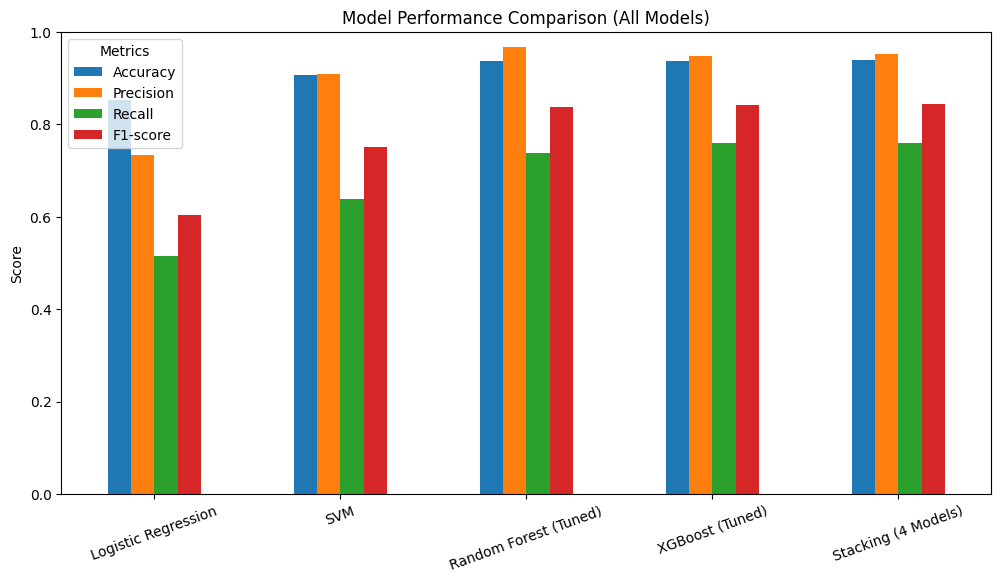

In [ ]:
# --- Predictions for all models ---
y_pred_log = log_reg.predict(X_test)   # Logistic Regression
y_pred_svm = svm_model.predict(X_test)  # SVM
y_pred_rf = best_rf.predict(X_test)     # Random Forest (Tuned)
y_pred_xgb = best_xgb.predict(X_test)   # XGBoost (Tuned)
y_pred_stacking = stacking_clf.predict(X_test)  # Stacking

# --- Collect results ---
results = {
    "Logistic Regression": evaluate_model(y_test, y_pred_log),
    "SVM": evaluate_model(y_test, y_pred_svm),
    "Random Forest (Tuned)": evaluate_model(y_test, y_pred_rf),
    "XGBoost (Tuned)": evaluate_model(y_test, y_pred_xgb),
    "Stacking (4 Models)": evaluate_model(y_test, y_pred_stacking)
}

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# --- Bar Graph ---
results_df.T.plot(kind="bar", figsize=(12,6))
plt.title("Model Performance Comparison (All Models)")
plt.ylabel("Score")
plt.xticks(rotation=20)
plt.ylim(0,1)
plt.legend(title="Metrics")
plt.show()

In [ ]:
loan_data

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,debt_to_income_ratio,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,cb_person_default_on_file_1,loan_status
1,-0.441400,-1.661153,-0.990236,2,-0.672302,0.602586,2.648167,-0.730419,0.572917,0,0,1,0,0,0,0,0,0,1
2,-0.766182,0.096582,-0.183346,2,2.352025,1.369462,2.648167,-0.999927,0.353053,0,0,1,0,0,0,0,1,0,1
3,-0.603791,-0.252450,0.892507,2,2.352025,1.057512,2.648167,-0.460911,0.425092,0,0,1,0,0,0,0,1,1,1
4,-1.090965,-1.651719,-0.721273,0,-1.187081,-1.259362,0.792429,-0.999927,0.252525,0,0,0,0,1,0,1,0,0,1
5,-0.279009,0.461335,0.892507,1,2.352025,0.456360,2.648167,-0.730419,0.299935,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32558,4.755119,-0.705247,-0.990236,0,0.957832,-0.687454,2.062144,2.638432,0.375000,0,0,1,0,0,0,0,1,0,1
32562,3.780772,-0.076362,-0.990236,0,-0.329116,0.000491,-0.379616,2.638432,0.125000,0,0,0,1,0,0,0,0,0,0
32566,4.592728,0.866966,-1.259199,0,-0.380594,-1.574560,-0.867968,2.638432,0.080000,0,0,0,1,0,0,0,0,0,0
32567,3.943163,0.080985,-0.183346,3,1.815797,1.483193,1.378451,2.638432,0.307673,0,0,0,1,0,0,0,1,1,1


**BUILDING PIPELINE**

In [ ]:
# Numeric pipeline: Scaling + PCA
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=5))   # Adjust n_components as needed
])

# Categorical pipeline: One-Hot
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Combine into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

In [ ]:
#column transformer:applies different transformations to different column groups
#Define numerical and categorical columns for the ColumnTransformer
numerical_cols_pipeline = [
    'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
    'debt_to_income_ratio' # Include the engineered feature
]

# 'person_home_ownership' was already one-hot encoded, so remove it from here
categorical_cols_pipeline = []


# Define preprocessing steps
# Numeric pipeline: Scaling + PCA
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=5))   # Adjust n_components as needed
])

# Categorical pipeline: One-Hot (This will be empty now, but the transformer is still needed in the ColumnTransformer structure)
categorical_transformer = OneHotEncoder(handle_unknown="ignore")


# Combine into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols_pipeline),
        ("cat", categorical_transformer, categorical_cols_pipeline) # Use updated categorical_cols_pipeline
    ],
    remainder='passthrough' # Keep remaining columns (including the pre-encoded ones like loan_grade, loan_intent_..., person_home_ownership_..., cb_person_default_on_file_1)
)

# Use the ImbPipeline object defined in cell 'sTsCGWjjozO4'
full_pipe = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('undersampler', RandomUnderSampler(random_state=42)),
    ('classifier', XGBClassifier(random_state=42, eval_metric='logloss'))
])


full_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=5))]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length',
                                                   'debt_to_income_ratio']),
                                                 ('cat',
                                                  OneHotEncoder(handle_u...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:

# Final Training Pipeline
# Define the model
xgb = XGBClassifier(
    random_state=42,
    eval_metric="logloss",
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)

# Build full pipeline (Preprocessor + Undersampling + Model)
full_pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),  # <-- your ColumnTransformer with OneHot, scaling, etc.
    ("undersampler", RandomUnderSampler(random_state=42)),
    ("classifier", xgb)
])

# Fit on training data
full_pipeline.fit(X_train, y_train)

# Evaluate on test set
y_pred = full_pipeline.predict(X_test)
y_proba = full_pipeline.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))

# ------------------------------
# Save Full Pipeline
# ------------------------------

# Ensure modal directory exists
os.makedirs("model", exist_ok=True)

joblib.dump(full_pipeline, "model/best_xgb.pkl")

print("✅ Full pipeline saved to model/best_xgb.pkl")


              precision    recall  f1-score   support

           0       0.94      0.89      0.91      5063
           1       0.67      0.79      0.72      1418

    accuracy                           0.87      6481
   macro avg       0.80      0.84      0.82      6481
weighted avg       0.88      0.87      0.87      6481

✅ Full pipeline saved to model/best_xgb.pkl
